In [1]:
#Import Statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [3]:
from sklearn.svm import SVC

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

In [6]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [7]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix 
from sklearn.metrics import classification_report, precision_recall_curve, auc

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [9]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


In [10]:
raw_df = pd.read_csv('C:/Users/airshu23/Desktop/Capstone2/ICPSR_20520/DS0001/Data.tsv', sep='\t')

C:\Users\airshu23\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (5,16,17,19,20,22,23,24,25,26,52,68,102,108,116,118,120,122,124,130,136,137,138,523,525,543,546,612,664) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
# Establish index to CASEID
raw_df.set_index('CASEID', inplace = True)

## Data Wrangling

In [12]:
# copy into new dataframe for modification
df = raw_df.copy()

In [13]:
# get columns for entire dataset
variables = list(df.columns)

In [14]:
# convert all entries to string so that the function in the next cell runs properly
df[variables] = df[variables].astype(str)

In [15]:
#check for alphabet in column values
def check(series):
    
    if series.str.contains('[a-z]', regex = True).sum() > 0:
        return True
    return False


In [16]:
# list of columns to drop from df
dropped = []

# gather all columns with non-digit strings (a-z)
for var in variables:
    if check(df[var]) == True:
        dropped.append(var)
        
print(dropped)

['V401A', 'V401B', 'V402B', 'V404A', 'V407B', 'V408F', 'V408I', 'V408L', 'V408O', 'V409B', 'V409C', 'V410', 'V410B', 'V414A1', 'V415A1', 'V416A', 'V417A', 'V418A', 'V425A', 'V427A', 'V436A', 'V438A', 'V439A', 'V439B', 'V443A']


In [17]:
# remove variables with alphabet characters
df.drop(dropped, inplace = True, axis=1)

In [18]:
df.head(5)

,V1,V2,V4,V5,V7,V8,V9,V10,V11,V13,...,V448G,V448H,V448I,V448J,V448K,V448L,V448M,V448N,V449,V450
CASEID,,,,,,,,,,,,,,,,,,,,,
1,257,1,7,8,1,,44,85,,1,...,0,0,0,0,0,0,0,0,2,13
2,2347,1,13,9,1,,102,,,1,...,0,0,0,0,0,0,0,0,3,12
3,860,1,12,9,2,1,78,69,1,1,...,1,1,1,0,0,0,0,0,2,2
4,5178,3,20,9,1,,82,78,1,1,...,0,0,0,0,0,0,1,0,1,5
5,1984,1,12,9,1,,101,78,2,1,...,0,0,1,1,0,0,1,0,1,4


In [19]:
#get columns from df
cols = list(df.columns)

# convert entries to numeric
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [20]:
df.head(5)

,V1,V2,V4,V5,V7,V8,V9,V10,V11,V13,...,V448G,V448H,V448I,V448J,V448K,V448L,V448M,V448N,V449,V450
CASEID,,,,,,,,,,,,,,,,,,,,,
1,257,1,7,8,1.0,NaN,44.0,85.0,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,13.0
2,2347,1,13,9,1.0,NaN,102.0,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,12.0
3,860,1,12,9,2.0,1.0,78.0,69.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
4,5178,3,20,9,1.0,NaN,82.0,78.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0
5,1984,1,12,9,1.0,NaN,101.0,78.0,2.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,4.0


In [21]:
df.shape

(5262, 639)

### Exploratory Data Analysis

Text(0.5,1,'Histogram')

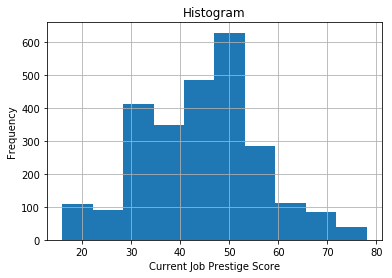

In [22]:
# Get histogram of Current job prestige score
fig1, ax1 = plt.subplots()
df.hist('V415E', ax = ax1)

ax1.set_xlabel("Current Job Prestige Score")
ax1.set_ylabel("Frequency")
ax1.set_title("Histogram")

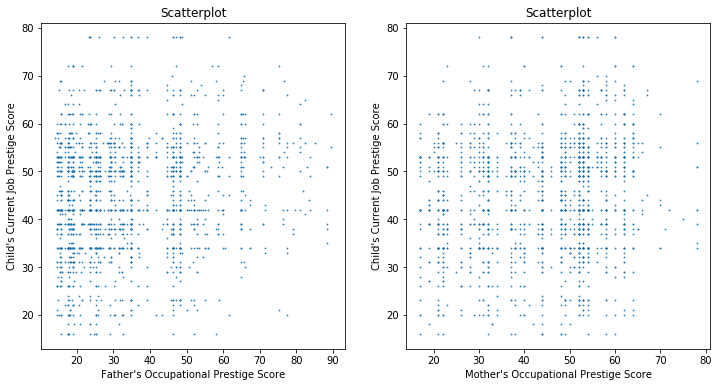

In [23]:
# Get histogram of Current job prestige score
fig2, (ax2, ax3) = plt.subplots(1,2)

df.plot.scatter(x='V124', y='V415E', s=0.5, ax = ax2)
df.plot.scatter(x='V126', y='V415E', s=0.5, ax = ax3)

ax2.set_xlabel("Father's Occupational Prestige Score")
ax2.set_ylabel("Child's Current Job Prestige Score")
ax2.set_title("Scatterplot")

ax3.set_xlabel("Mother's Occupational Prestige Score")
ax3.set_ylabel("Child's Current Job Prestige Score")
ax3.set_title("Scatterplot")

fig2.set_size_inches(12, 6)

In [24]:
# job's prestige score Grouped by race/ethnicity

avg_by_ethnicity = df.groupby('V323A')[['V415E']].mean()

In [25]:
s = pd.Series(['White', 'Black', 'Asian', 'Multiracial', 'Hispanic', 'Nationality', 'Other'])

Text(0.5,1,'Average Occupational Prestige by Race')

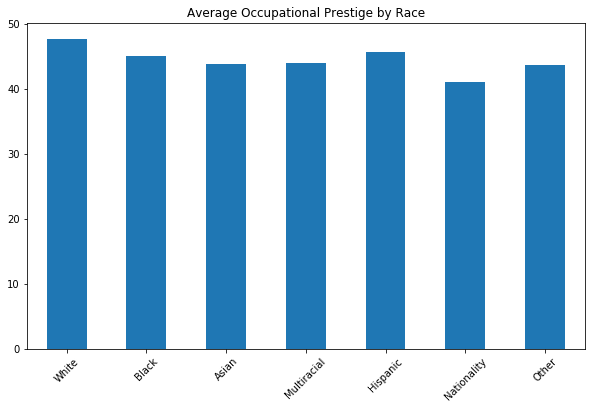

In [26]:
ax4 = avg_by_ethnicity.set_index(s).plot.bar(rot = 45, legend = False, figsize = (10,6))
ax4.set_title('Average Occupational Prestige by Race')

### Pre-processing

In [27]:
features = list(df.columns)

# get index of first year 2005 follow-up variable
first_2005 = features.index('V400')

# get index of last year 2005 follow-up variable
last_2005 = features.index('V426A')

In [28]:
#all variables from 2005 followup
variables_2005 = set(features[first_2005:last_2005+1])

#target variable to keep
keep_2005 = set(['V448M'])

# remove 2005 variables V448M
drop_2005 = list(variables_2005.difference(keep_2005))

#drop from column headers above
df1 = df.drop(drop_2005, axis=1)


In [29]:
print (df1.shape)

(5262, 586)


In [30]:
# remove rows that do not have target variable
df1 = df1[pd.notnull(df1['V448M'])]

# remove rows that do not have parental survey completed
df1 = df1[pd.notnull(df1['P2A'])]

Removing columns that have less than 75% of the column entries filled without n/a

In [31]:
# missing values
test1 = df1.isnull().sum() / len(df1)

#all columns where number of missing values exceed 25%
testing = test1[test1>=0.25]

#columns in original df that have below 75% of values that is n/a 
below75 = list(testing.index.values)

#drop from column headers above
df2 = df1.drop(below75, axis=1)

print (df2.shape)


(1703, 462)


In [32]:
# imputing values for missing entries
df3 = df2.fillna(df2.median())

In [33]:
df3.isnull().values.any()

False

# Implementing Models

In [34]:
# split into feature and target variable

X = df3.drop('V448M', axis = 1)
y = df3['V448M']

In [35]:
# Standardizing values
scaler = StandardScaler()
scaled_values = scaler.fit_transform(X)

#standardized dataframe
features = pd.DataFrame(scaled_values, columns = X.columns)

In [36]:
#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.20, random_state=70)

## Logistic Model 

In [37]:
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[162  55]
 [ 51  73]]
             precision    recall  f1-score   support

        0.0       0.76      0.75      0.75       217
        1.0       0.57      0.59      0.58       124

avg / total       0.69      0.69      0.69       341



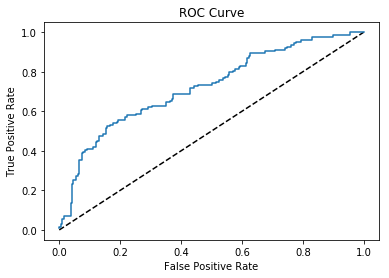

In [38]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Random Forest Model

In [39]:
# Instantiate
rf = RandomForestClassifier(n_estimators=10000)  
# Fit
rf_model = rf.fit(X_train, y_train) 


In [40]:
# Predict the labels of the test set: y_pred
y_pred_rf = rf.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[192  25]
 [ 59  65]]
             precision    recall  f1-score   support

        0.0       0.76      0.88      0.82       217
        1.0       0.72      0.52      0.61       124

avg / total       0.75      0.75      0.74       341



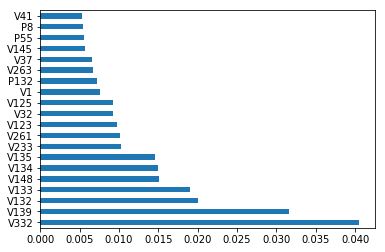

In [41]:
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index= X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

The index values above refer to....

V332 - Highschool GPA
<br>
V139 - Middleschool GPA
<br>
V132/ V133 - Stanford Math Achievement Test Percentile/ Score
<br>
V148 - Parents Composite Socio-Economic Index
<br>
V134/V135 - - Stanford Reading Achievement Test Percentile/ Score
<br>
V261 - Ordinal Value for Highest Level of Expected Education 
<br>
V123 - Father's Socio-Economic Index score
<br>
V125 - Father's Occupational Prestige Score
<br>
P132 - Parent's Educational Expectation for Child (Ordinal)
<br>
V145 - Percent of Students Eligible for Subsidized Lunch at School
<br>
P55 - Parent household monthly earnings
<br>
V41 - Mother's Highest Level of Education (Ordinal)


In [42]:
# Evaluate the model using 5-fold cross-validation
rf_cv_scores = cross_val_score(RandomForestClassifier(max_depth = 5), X_test, y_test, scoring='recall', cv=5)  
rf_cv_mean = np.mean(rf_cv_scores)  

print(rf_cv_mean)

0.41900000000000004


## Support Vector Machine

In [43]:
# Instantiate
svm_model = SVC(probability=True)  
# Fit
svm_model = svm_model.fit(X_train, y_train)  


In [44]:
# Predict the labels of the test set: y_pred
y_pred_svm = svm_model.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

[[182  35]
 [ 51  73]]
             precision    recall  f1-score   support

        0.0       0.78      0.84      0.81       217
        1.0       0.68      0.59      0.63       124

avg / total       0.74      0.75      0.74       341



In [45]:
# Evaluate the model using 5-fold cross-validation
svm_cv_scores = cross_val_score(SVC(probability=True), X_test, y_test, scoring='recall', cv=5)  
svm_cv_mean = np.mean(svm_cv_scores)

print(svm_cv_mean)

0.322
